<a href="https://colab.research.google.com/github/ShahZebYousafzai/Deep-Learning-Basics/blob/main/2_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a neumerical based on some other combination of variables, even shorter ... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating a data to view and fit

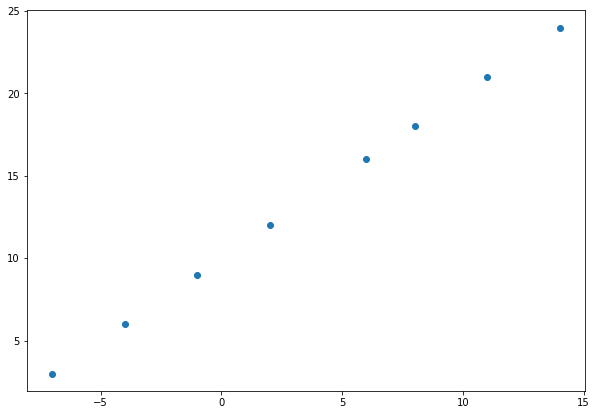

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 6.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 16.0, 18.0, 21.0, 24.0])

# Visualize it
plt.figure(figsize=(10,7))
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0] 

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  6.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 16., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

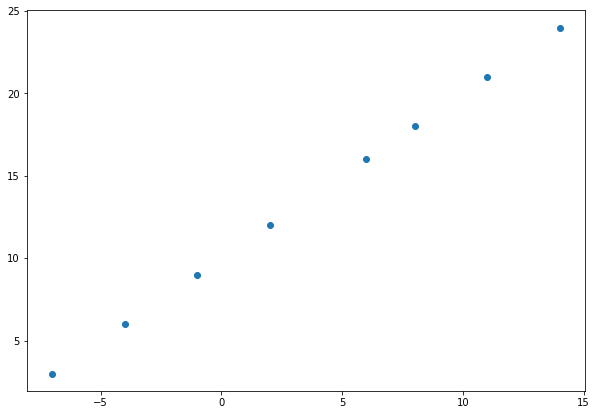

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrices (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the try to find patterns between X & y (features and labels.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)                              
                            ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error for mae
              optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent for sgd
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 254ms/step - loss: 11.5585 - mae: 11.5585
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.4171 - mae: 11.4171
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2757 - mae: 11.2757
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1343 - mae: 11.1343
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9929 - mae: 10.9929


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  6.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 16., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.8222685]], dtype=float32)

In [ ]:
y_pred + 10

array([[22.82227]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of layers, increase the number of hidden units (all called neurons) withing each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit our model for more **epochs** (leaving it for training a little longer) or on more data (give model more examples to learn from).

### Let's rebuild our model

#### Increasing the epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)                              
                            ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error for mae
              optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent for sgd
              metrics=["mae"])

# 3. Fit the model (this time increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 268ms/step - loss: 11.5585 - mae: 11.5585
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4171 - mae: 11.4171
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2757 - mae: 11.2757
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1343 - mae: 11.1343
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9929 - mae: 10.9929
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8515 - mae: 10.8515
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7101 - mae: 10.7101
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5687 - mae: 10.5687
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4273 - mae: 10.4273
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2859 - mae: 10.2859
Epoch 11/100
1/1 [==============================] - 0s 8m

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  6.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 16., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Check if our model imroved
y_pred = model.predict([17.0])
y_pred

array([[31.088549]], dtype=float32)

#### Add 2 more hidden layers with 100 hidden units

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1)                              
                            ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error for mae
              optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent for sgd
              metrics=["mae"])

# 3. Fit the model (this time increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 12.5004 - mae: 12.5004
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3912 - mae: 12.3912
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2718 - mae: 12.2718
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1408 - mae: 12.1408
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9965 - mae: 11.9965
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8372 - mae: 11.8372
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6604 - mae: 11.6604
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4636 - mae: 11.4636
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2436 - mae: 11.2436
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9966 - mae: 10.9966
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Check if our model imroved
y_pred = model.predict([17.0])
y_pred

array([[29.246553]], dtype=float32)

#### Changing the optimizer SGD to Adam

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50),
                             tf.keras.layers.Dense(1)                            
                            ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error for mae
              optimizer=tf.keras.optimizers.Adam(lr=0.1),  # Stochastic Gradient Descent for sgd
              metrics=["mae"])

# 3. Fit the model (this time increase the epochs)
model.fit(X, y, epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
1/1 [==============================] - 0s 375ms/step - loss: 13.2957 - mae: 13.2957
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 6.6569 - mae: 6.6569
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 13.4015 - mae: 13.4015
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 7.7621 - mae: 7.7621
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 7.1542 - mae: 7.1542
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 8.4987 - mae: 8.4987
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 8.0912 - mae: 8.0912
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 6.5421 - mae: 6.5421
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 4.0528 - mae: 4.0528
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 2.9951 - mae: 2.9951
Epoch 11/200
1/1 [==============================] - 0s 14ms/step - loss:

In [ ]:
# Check if our model imroved
y_pred = model.predict([17.0])
y_pred

array([[27.52472]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is

```
Build a model -> fit it -> evaluate it -> tweak a mode - > fit it -> evaluate it -> tweak a mode -> evaluate it ...
```

> 🛠️ In above model the things we tweaked are called `hyperparameter`

When it comes to evaluation ... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* THe data - what data are we working with? What does it look like?
* The model itsel - what our model looks like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dateset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

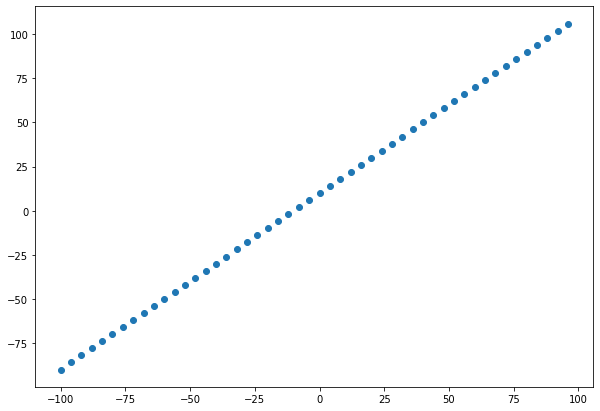

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data which is tpically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]   # first 10 are testing samples (10% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got out data in the training and test set ... let's visualize it again!

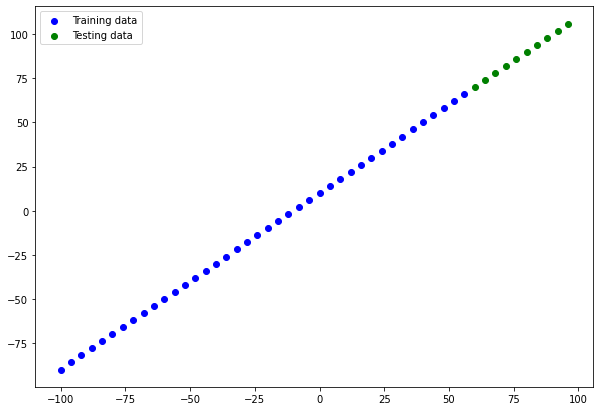

In [ ]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")    # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [ ]:
# Let's have a look how to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

⚠️ The above error is because we have not fit the model but if we define the input shape to our layer we can get the models information

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typically when you bring in already learned patterns or parameters from other models during **transfer learning**)

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within layers, check out [MIT's introduction to deep learning video](http://introtodeeplearning.com/). 

> 🛠️ **Exercise:** Try laying around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.



In [ ]:
# Let's fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=0) # with verbose we can see how our model trains

In [ ]:
# Get a summary of our model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


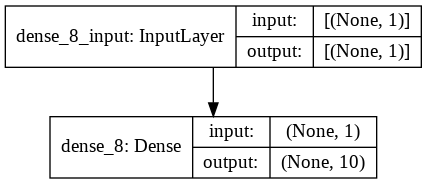

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]),
                             tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


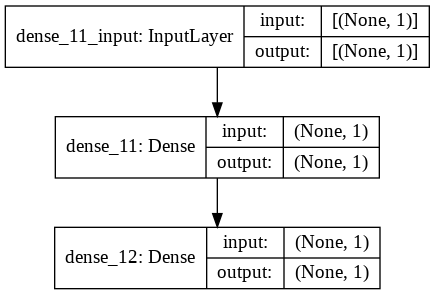

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Ofeten we'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[22.26224 ],
       [23.746387],
       [25.230537],
       [26.714685],
       [28.198835],
       [29.682983],
       [31.167135],
       [32.651283],
       [34.135433],
       [35.619583]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

> 🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot the testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

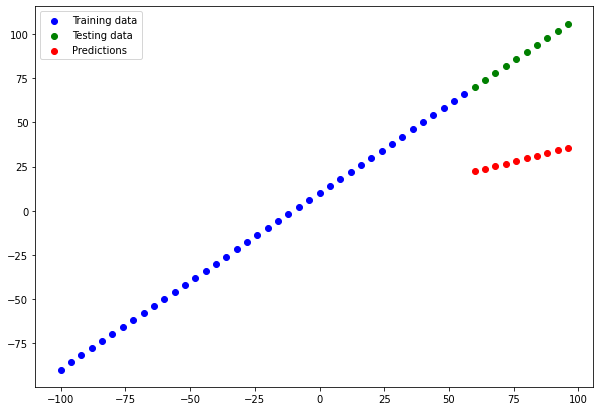

In [ ]:
plot_predictions()

### Evaluating our mode's predictions with regression evaluation metrices

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error "on avarage, how wrong is each of my model's predictions".
* MSE - mean square error, "square the average errors"


In [ ]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 198ms/step - loss: 59.0591 - mae: 59.0591


[59.05908966064453, 59.05908966064453]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([65.73776 , 64.25362 , 62.769463, 61.285316, 59.80116 , 58.317017,
       56.832863, 55.348717, 53.864563, 52.38042 ], dtype=float32)>

In [ ]:
y_pred

array([[22.26224 ],
       [23.746387],
       [25.230537],
       [26.714685],
       [28.198835],
       [29.682983],
       [31.167135],
       [32.651283],
       [34.135433],
       [35.619583]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

🔑**Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([22.26224 , 23.746387, 25.230537, 26.714685, 28.198835, 29.682983,
       31.167135, 32.651283, 34.135433, 35.619583], dtype=float32)>

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=59.05909>

In [ ]:
mse = tf.keras.metrics.mean_squared_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3540.1946>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))

In [ ]:
mae(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=59.05909>

In [ ]:
mse(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3540.1946>

### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer**- give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.



#### **Build `model_1`**

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

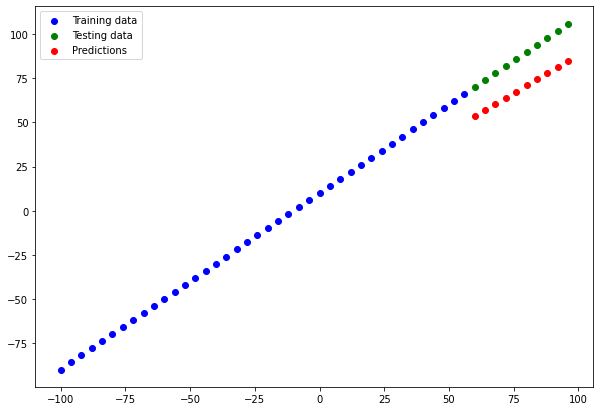

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

#### Build `model_2`**

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 3ms/

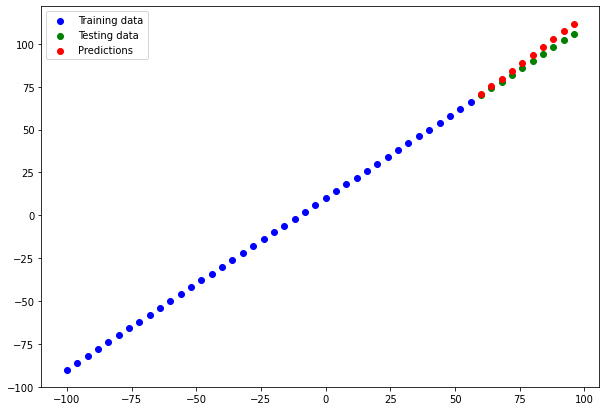

In [ ]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

#### **Build `model_3`**

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms/

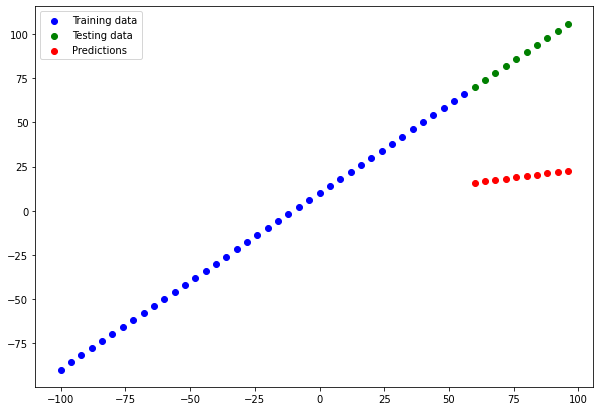

In [ ]:
# Make and plot predictions for model_1
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_2 metrics
mae_3 = mae(y_test, y_preds_3)
mse_3= mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary 

> "Experiments,Experiments,Experiments!!!!"

### Comparing results

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344



From our experiments, it looks like model_2 performed the best.

In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

And when doing so, it can be tedious if you're running lots of experiments

Luckily, there are tools to help us

📖 **Resource:** As you build more models, you'll want to look into using:
* **[TensorBoard](https://tensorboard.dev/)** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **[Weights & Biases](https://wandb.ai/site)** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving our models

Saving our model allows us to use themoutside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. THe HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SaveModel_format")

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


If you are staying in pure TensorFlow code, you are probably better off using the SaveFormat Method.

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_SaveModel_format.h5")

If you are going out from TensorFlow code, you are probably better off using the HDF5 Method.

### Loading a saved Model


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds =model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using the .h6 format
loaded_h5_model = tf.keras.models.load_model("best_model_SaveModel_format.h5")

In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the .h5 version (should return True)
model_2_preds =model_2.predict(X_test)
loaded_h5_format_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model or any other file from Google Colab

If you want to download your files from Google Colab:

1. You can go to "files" tab and right click on the file you're after and click 'download'.
2. Use Code (see the cell below).
3. Save it to Google Drive by connecting to Gogle Drive and copying it there (See 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_SaveModel_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (Requires mounting Google Drive)
!cp /content/best_model_SaveModel_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 best_model_SaveModel_format.h5  'Google Earth'
'Colab Notebooks'		 'Thesis Improved (71321).docx'


## A Larger Example

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

The link to the dataset is in [Kaggle's Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) and the raw dataset of the insurance is hosted on [Github](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.


In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset and check the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We can see from the above that some of our data are objects and some are numerical values. In ML, we first have to convert our objects to numerical values meaning we have to do `one-hot encoding`.

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neuaral network
tf.random.set_seed(42)

# 1.Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of insurance model on the test model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median()

9575.4421

In [ ]:
y_train.mean()

13346.089736364489

Right now it looks like our model is ot performing very well so we will try to improve it by:
1. Adding a layer.
2. Training it for longer (200 epochs).
3. Changing the optimizer SGD to Adam.

In [ ]:
# Build a neuaral network
tf.random.set_seed(42)

# 1.Create a model
insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

> 🔑 **Note:** For many problems, the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) is a great starting choice. See Andrei Karpathy's "Adam is safe" point from[ A Recipe for Training Neural Networks](http://karpathy.github.io/2019/04/25/recipe/) for more.

In [ ]:
# Check the results of insurance model on the test model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

We have defined history befor for fit to plot the graph of our model to check the performance. So, let's check that out.

Text(0.5, 0, 'epochs')

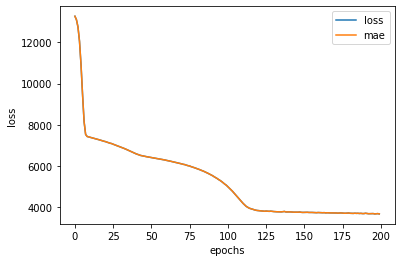

In [ ]:
# Plot history/ loss curve/training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **🤔 Question:** How long should you train for?

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

## Preprocessing data (Normalization and Standardization)

Let us check the things we have done.
1. Not all our data will be in numbers, so before building a model we need to do numerical encoding. ✔️
2. We have to make sure all tensors are in the right shape. ✔️
3. Scale features ([normalize](https://en.wikipedia.org/wiki/Normalization_(statistics)) and [standardize](https://en.wikipedia.org/wiki/Standardization), mostly normalization) ❌

Let's look at the 3rd point

In [ ]:
# Look at the dataset
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


We can see that 'age' and 'bmi' are at different scale.

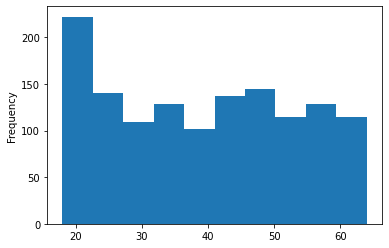

In [ ]:
X["age"].plot(kind="hist")

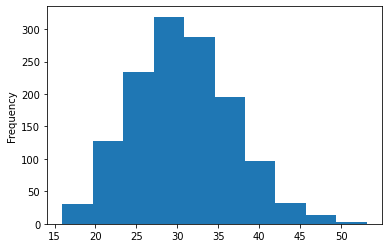

In [ ]:
X["bmi"].plot(kind="hist")

We want to get both of them at the same scale. This is where normalization comes in. It scales the features between 0 and 1 and perserves all the distribution.

Other is standardization which removes the mean and divides each value by [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation). This reduces the effect of outliers.

In terms of scaling values, neural networks tend to prefer normalization and often you'll see that neural networks perform well with minimum feature values.

These scaling techniques are called `Feature Scaling`.

If not sure which one to use, you can try both and see which perform well.

📚 **Resources:** Look at the following resources to understand better:
* [Scikit-Learn's documentation on preprocessing data.](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset and check the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder # MixMaxScalar for normalization, OneHotEncoder for numerical encoding
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # Numerical encode the strings
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training data and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like before?
X_train.loc[0] 

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# What does our data look like now?
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Now, our data is in numerical format and this means we can pass it to our neural network.

In [ ]:
# Let's check the shapes before and now
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model and see how it goes.

In [ ]:
# Build a neural network model to fit our normalized data

# Create the model
insurance_model_3 =  tf.keras.Sequential([
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_3.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13344.1953 - mae: 13344.1953
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13336.0244 - mae: 13336.0244
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13315.7998 - mae: 13315.7998
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13272.6104 - mae: 13272.6104
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13195.0557 - mae: 13195.0557
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13071.6191 - mae: 13071.6191
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12891.7305 - mae: 12891.7305
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12645.2568 - mae: 12645.2568
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12322.0635 - mae: 12322.0635
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11917.58

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.4167 - mae: 3170.4167


[3170.416748046875, 3170.416748046875]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961

We can see that there are some improvements(not that much) but we can improve the results by more improvements in our model.

We can conclude that normalization does not garuntee much improvements in our results much we can definitely try to improve our results.

But there is one huge benifit of normalization which is that our model **converges faster**.

In [ ]:
insurance_model_3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
